**Projet portant sur la prévision d'octroi d'un crédit immobilier ou non aux clients d'une banque**

In [99]:
# Importation les packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Pour stocker notre modèle, on importe le package ci-dessous :
import pickle

##Ouverture de la base des données

In [100]:
df_credit = pd.read_csv('/content/drive/MyDrive/train.csv')

In [101]:
df_credit

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [102]:
df = df_credit.copy() #Pour garder une copie de ma base des données

In [103]:
df.info() #Notre base des données contient variables catégorielles et numériques

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [104]:
df.shape #La base des données contient 13 colonnes et 614 lignes

(614, 13)

In [105]:
# Vérification des valeurs manquantes
df.isnull().sum()
# Notre base des données contient des valeurs manquantes mais leur nombre n'est pas flagrant

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Pour supprimer les valeurs manquantes :

*   Pour les variables catégorielles : on va les remplacer par le mode de la colonne
*   Pour les variables numériques : on va les remplacer par la médiane ou la moyenne



In [106]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [107]:
# Déterminons les variables numériques et catégorielles

var_cat = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
var_num = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
print('Les variables catégorielles sont:',var_cat)
print('Les variables numériques sont:',var_num)

Les variables catégorielles sont: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
Les variables numériques sont: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [108]:
# Suppression des valeurs manquantes du côté des variables catégorielles

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True) 

In [109]:
# Suppression des valeurs manquantes du côté des variables numériques
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0],inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace = True)

In [110]:
df.isnull().sum()
#Notre base des données ne contient plus de valeurs manquantes

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##Analyse univariée


In [111]:
#Notre variable dépendante est "Loan_Status"
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [112]:
df['Loan_Status'].value_counts(normalize=True)*100
#Nous voyons que 68.72% de crédits ont été accordés, contre 31,27% de crédits refusés

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

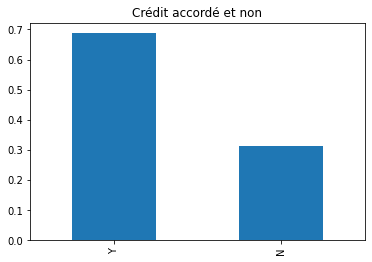

In [113]:
df['Loan_Status'].value_counts(normalize=True).plot.bar(title='Crédit accordé et non')

Les variables catégorielles

In [114]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [115]:
df['Gender'].value_counts(normalize=True)*100
#Nous voyons que les hommes demandent souvent le crédit contrairement aux femmes

Male      81.758958
Female    18.241042
Name: Gender, dtype: float64

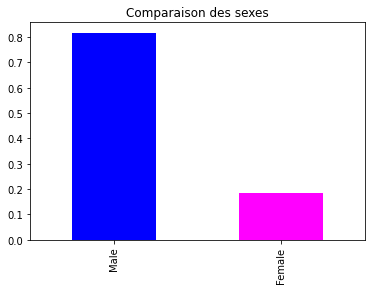

In [116]:
df['Gender'].value_counts(normalize=True).plot.bar(title='Comparaison des sexes', color=['blue','magenta'])

In [117]:
# Married
df['Married'].value_counts(normalize=True)*100

Yes    65.309446
No     34.690554
Name: Married, dtype: float64

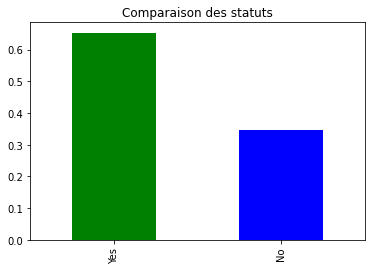

In [118]:
df['Married'].value_counts(normalize=True).plot.bar(title='Comparaison des statuts', color=['green','blue'])

In [119]:
#Self_employed
df['Self_Employed'].value_counts(normalize=True)*100

No     86.644951
Yes    13.355049
Name: Self_Employed, dtype: float64

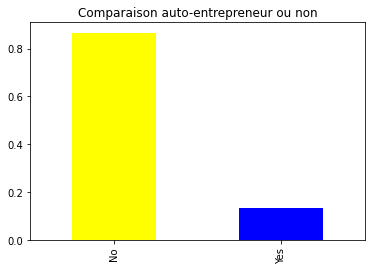

In [120]:
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Comparaison auto-entrepreneur ou non', color=['yellow','blue'])

In [121]:
#Credit_history
df['Credit_History'].value_counts(normalize=True)*100

1.0    85.504886
0.0    14.495114
Name: Credit_History, dtype: float64

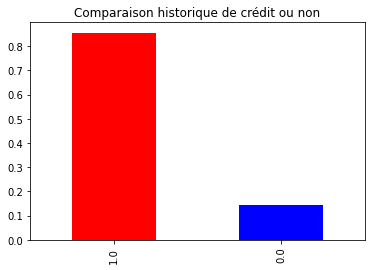

In [122]:
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Comparaison historique de crédit ou non', color=['red','blue'])

In [123]:
#Dependents
df['Dependents'].value_counts(normalize=True)*100

0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: Dependents, dtype: float64

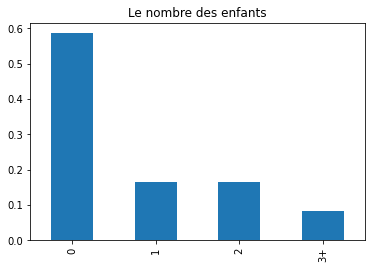

In [124]:
df['Dependents'].value_counts(normalize=True).plot.bar(title='Le nombre des enfants')
#Nous voyons sur ce graphique que la majorité de nos demandeurs de crédits sont sans enfants

Les variables numériques

In [125]:
df[var_num]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,120.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


In [126]:
df[var_num].describe()
#Avec cette ligne de code, nous obtenons les statistiques de toutes nos variables
#numériques telles que la moyenne, l'écart-type, la médiane, etc.
#Le salaire moyen des demandeurs de crédit s'élève à 5403.4592
#Le salaire moyen du conjoint demandeur est de 1621.245798 dollars
#Le montant moyen du crédit est de 145752443 dollars

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423
std,6109.041673,2926.248369,84.180967,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,125.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


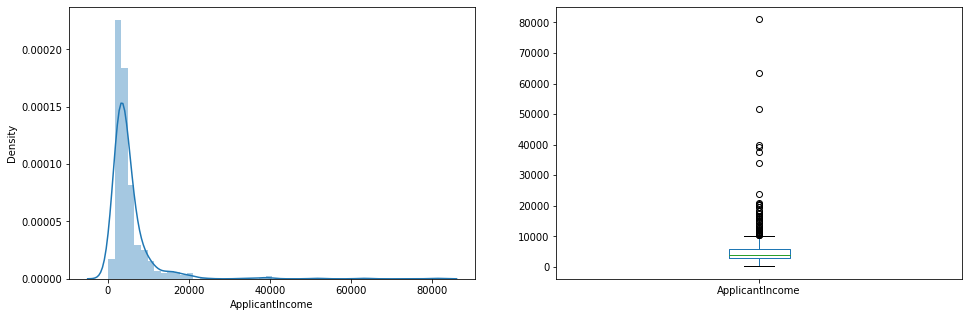

In [127]:
#Variable : ApplicantIncome
plt.figure(1)

plt.subplot(121)
sns.distplot(df['ApplicantIncome'])

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.suptitle('')
plt.show()

#Dans le premier graphique, nous voyons que tous les salaires tournent entre 3000 et 5000 dollars
#Dans le second graphique, nous voyons que la variable salaire contient beaucoup de valeurs abhérantes.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


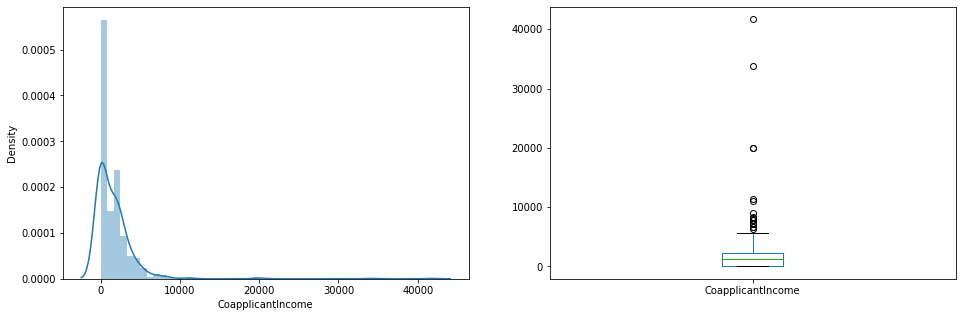

In [128]:
#Variable : CoapplicantIncome
plt.figure(1)

plt.subplot(121)
sns.distplot(df['CoapplicantIncome'])

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.suptitle('')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


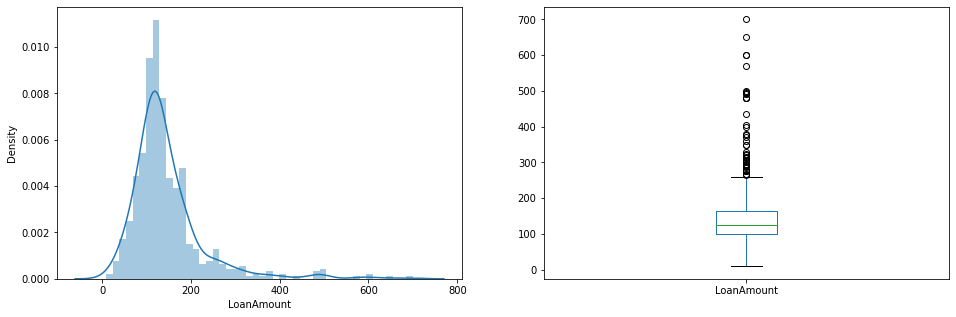

In [129]:
#Variable : LoanAmaount
plt.figure(1)

plt.subplot(121)
sns.distplot(df['LoanAmount'])

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.suptitle('')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


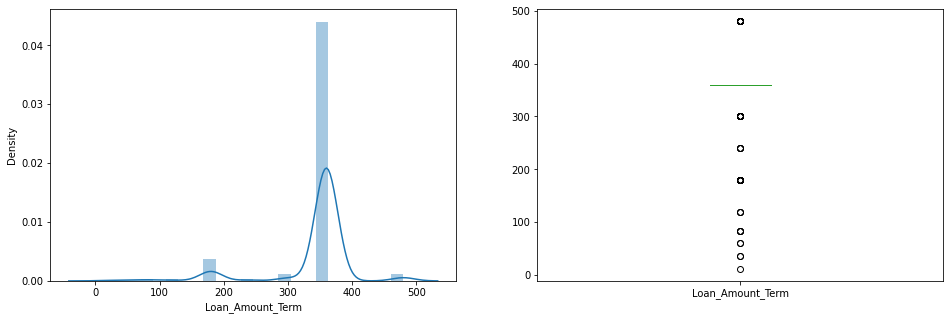

In [130]:
#Variable : Loan_Amount_Term
plt.figure(1)

plt.subplot(121)
sns.distplot(df['Loan_Amount_Term'])

plt.subplot(122)
df['Loan_Amount_Term'].plot.box(figsize=(16,5))

plt.suptitle('')
plt.show()

## Analyse bivariée

In [131]:
var_cat_bis = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History', 'Property_Area']

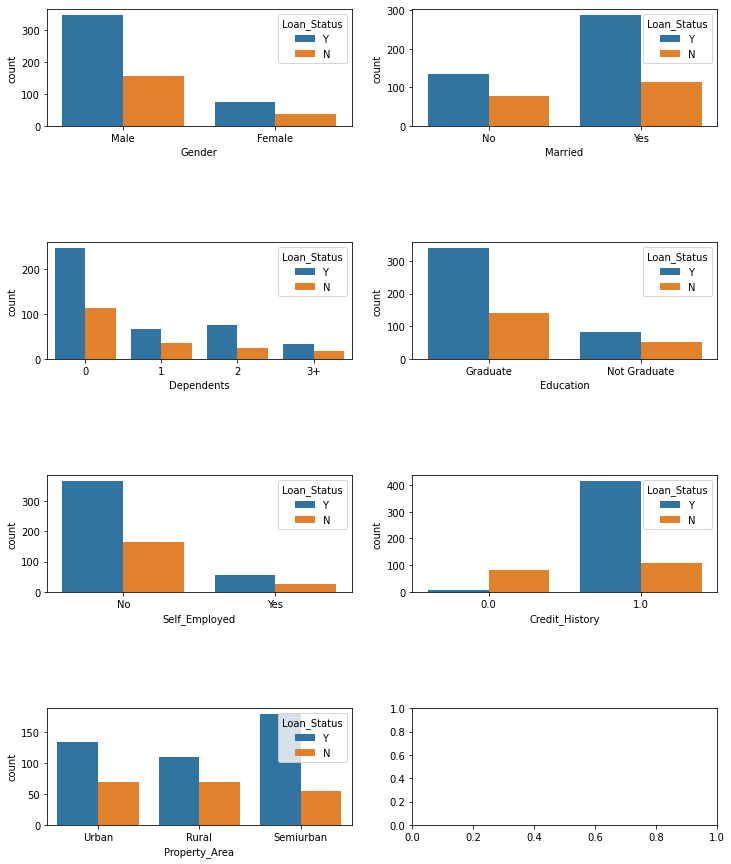

In [132]:
#Les variables catégorielles
#On étudie la relation existante entre la variable 'Loan_Status' et toutes les autres variables catégorielles
fig, axes = plt.subplots(4,2, figsize = (12,15))
for idx, cat_col in enumerate(var_cat_bis):
  row, col = idx//2, idx%2
  sns.countplot(x = cat_col, data = df, hue = 'Loan_Status', ax = axes[row, col])
plt.subplots_adjust(hspace = 1)

#Sur le 1er graphique en lien avec le sexe, quand on est une femme, on a 50% de chance d'avoir un refus de crédit. Quand on est un homme, on a 60% ou 70% de chance d'avoir un crédit.
#Sur le 2nd graphique, quand on n'est pas marié, on a 40% de chance que son crédit soit accepté et 60% de chance qu'il soit refusé. Quand on est marié, on a plus de chance que son crédit soit accepté et moins de chance qu'il soit refusé.
#Quand on n'a pas d'enfants, on a plus de chance d'obtenir que lorsque nous avons un enfant et surtout plus de 3 enfants.
#Quand on a un historique de crédit, on a plus de chance d'obtenir un crédit.

## Matrice de corrélation pour les variables numériques

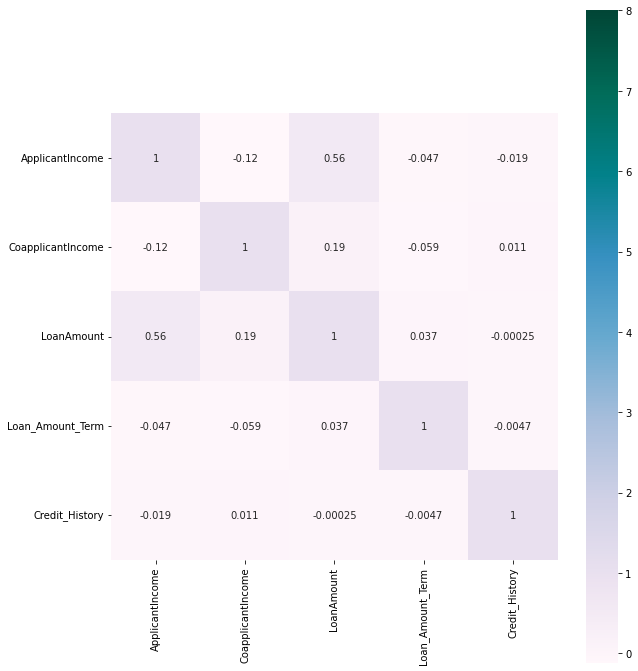

In [133]:
matrix = df.corr()
f, ax = plt.subplots(figsize = (10, 12))
sns.heatmap(matrix, vmax = 8, square = True, cmap = 'PuBuGn', annot = True)

#Les corrélations sont assez faibles entre nos variables numériques; les seules variables corrélées sont 'ApplicantIncome' et 'LoanAmount'.

# Création du modèle

In [134]:
df_cat = df[var_cat]
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


In [135]:
#Nous allons transformer l'encodage de nos variables catégorielles en numériques
df_cat = pd.get_dummies(df_cat, drop_first = True)
df_cat

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1.0,1,0,0,0,0,0,0,0,1,1
1,1.0,1,1,1,0,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,1,0,1,1
3,1.0,1,1,0,0,0,1,0,0,1,1
4,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,1
610,1.0,1,1,0,0,1,0,0,0,0,1
611,1.0,1,1,1,0,0,0,0,0,1,1
612,1.0,1,1,0,1,0,0,0,0,1,1


In [136]:
df_num = df[var_num]
df_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,120.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


In [137]:
#Nous allons concaténer nos deux bases de données vu qu'elles sont toutes numériques
df_encoded = pd.concat([df_cat, df_num], axis = 1)
df_encoded

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1,0,0,0,0,0,0,0,1,1,5849,0.0,120.0,360.0
1,1.0,1,1,1,0,0,0,0,0,0,0,4583,1508.0,128.0,360.0
2,1.0,1,1,0,0,0,0,1,0,1,1,3000,0.0,66.0,360.0
3,1.0,1,1,0,0,0,1,0,0,1,1,2583,2358.0,120.0,360.0
4,1.0,1,0,0,0,0,0,0,0,1,1,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,1,2900,0.0,71.0,360.0
610,1.0,1,1,0,0,1,0,0,0,0,1,4106,0.0,40.0,180.0
611,1.0,1,1,1,0,0,0,0,0,1,1,8072,240.0,253.0,360.0
612,1.0,1,1,0,1,0,0,0,0,1,1,7583,0.0,187.0,360.0


In [138]:
#Avant de construire notre algorithme de machine learning, nous allons mettre à part notre variable target 'Loan_Status_Y'
y = df_encoded['Loan_Status_Y']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

In [139]:
#Nous allons à présent construire une base de données ne contenant que nos features
X = df_encoded.drop('Loan_Status_Y', axis = 1)
X

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1,0,0,0,0,0,0,0,1,5849,0.0,120.0,360.0
1,1.0,1,1,1,0,0,0,0,0,0,4583,1508.0,128.0,360.0
2,1.0,1,1,0,0,0,0,1,0,1,3000,0.0,66.0,360.0
3,1.0,1,1,0,0,0,1,0,0,1,2583,2358.0,120.0,360.0
4,1.0,1,0,0,0,0,0,0,0,1,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,2900,0.0,71.0,360.0
610,1.0,1,1,0,0,1,0,0,0,0,4106,0.0,40.0,180.0
611,1.0,1,1,1,0,0,0,0,0,1,8072,240.0,253.0,360.0
612,1.0,1,1,0,1,0,0,0,0,1,7583,0.0,187.0,360.0


In [140]:
# Spécification de la partie test(20%) et la partie train(80%)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6)

In [141]:
#Instancier le modèle
clf = LogisticRegression()
#Entraînement du modèle
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
#Test du modèle
pred = clf.predict(x_test)
pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [143]:
y_test

387    0
266    1
292    1
392    1
332    1
      ..
309    1
511    1
98     1
238    1
462    1
Name: Loan_Status_Y, Length: 123, dtype: uint8

In [144]:
accuracy_score(y_test, pred)
#Nous voyons que notre modèle est précis à 83,73%
#On peut normaliser nos données afin d'améliorer notre précision ou notre score

0.8373983739837398

In [145]:
X.columns

Index(['Credit_History', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [146]:
#Mise en place d'une prévision
#La liste ci-dessous correspond aux informations fournies par le client (credit_history, gender_male, etc).
profil_test = [[1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 100, 0, 400, 360]]
clf.predict(profil_test)

#Nous avons comme résultats 1, ce qui signifie que ce client a la chance d'obtenir une crédit auprès de la banque bien que son revenu soit moyen.

array([1], dtype=uint8)

In [149]:
#Enregistrement du modèle :
pickle.dump(clf, open('prevision_credit.pkl', 'wb'))